In [239]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("voice.csv",header=0)


In [240]:
data.shape


(3168, 21)

In [241]:
print(data.head(5))
data.info()


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [242]:
##data.drop(data.index[0],inplace=True)

In [243]:
#y=data[20]
#y
#x=data.iloc[:,0:19]
#data["label"]
data.index
data.columns
data.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#data.head(3)
data[20]

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: 20, Length: 3168, dtype: object

In [244]:
labelencoder=LabelEncoder()
data[20]=labelencoder.fit_transform(data[20])
#data=data.drop(columns=[20,"label"],axis=1)
#data.info()
#data.head(4)
#data.info()
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,1


In [245]:
#data.info()
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [20])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

data1 = np.array(ct.fit_transform(data), dtype=np.float)
#onehotencoder=OneHotEncoder(cate= [20])
#data= onehotencoder.fit_transform(data).toarray()
#print(data)
print(data1)

[[0.         1.         0.05978098 ... 0.0078125  0.         0.        ]
 [0.         1.         0.06600874 ... 0.0546875  0.046875   0.05263158]
 [0.         1.         0.0773155  ... 0.015625   0.0078125  0.04651163]
 ...
 [1.         0.         0.14205626 ... 2.9375     2.9296875  0.19475862]
 [1.         0.         0.14365874 ... 3.59375    3.5859375  0.31100218]
 [1.         0.         0.16550895 ... 0.5546875  0.546875   0.35      ]]


c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [246]:
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
0     3168 non-null float64
1     3168 non-null float64
2     3168 non-null float64
3     3168 non-null float64
4     3168 non-null float64
5     3168 non-null float64
6     3168 non-null float64
7     3168 non-null float64
8     3168 non-null float64
9     3168 non-null float64
10    3168 non-null float64
11    3168 non-null float64
12    3168 non-null float64
13    3168 non-null float64
14    3168 non-null float64
15    3168 non-null float64
16    3168 non-null float64
17    3168 non-null float64
18    3168 non-null float64
19    3168 non-null float64
20    3168 non-null int32
dtypes: float64(20), int32(1)
memory usage: 507.5 KB


In [247]:
x = data.iloc[:,0:19]
y = data[20]
y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: 20, Length: 3168, dtype: int32

In [248]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
#pred=[5,1,8,9,12,11,3,0,2,18,17,15,10]
train, test = train_test_split(data, test_size = 0.2,random_state=6)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(2534, 21)
(634, 21)


In [249]:
x_train = train.iloc[:,0:19]# taking the training data input
y_train=train[20]# This is output of our training data
# same we have to do for test
x_test= test.iloc[:,0:19] # taking test data inputs
y_test =test[20]   #output value of test dat

In [250]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
temp=logistic.predict(x_test)
print(metrics.accuracy_score(temp,y_test)) # to check the accuracy

0.9053627760252366


c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [251]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,1


In [258]:
corr = data.corr() # .corr is used for find corelation
print(corr)
print(corr.shape[0])

          0         1         2         3         4         5         6   \
0   1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605 -0.322327   
1  -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660  0.314597   
2   0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352 -0.257407   
3   0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189 -0.319475   
4   0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636 -0.206339   
5  -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000  0.249497   
6  -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497  1.000000   
7  -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185  0.977020   
8  -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813 -0.195459   
9  -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601  0.079694   
10  0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764 -0.434859   
11  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605 -0.322327   
12  0.460844

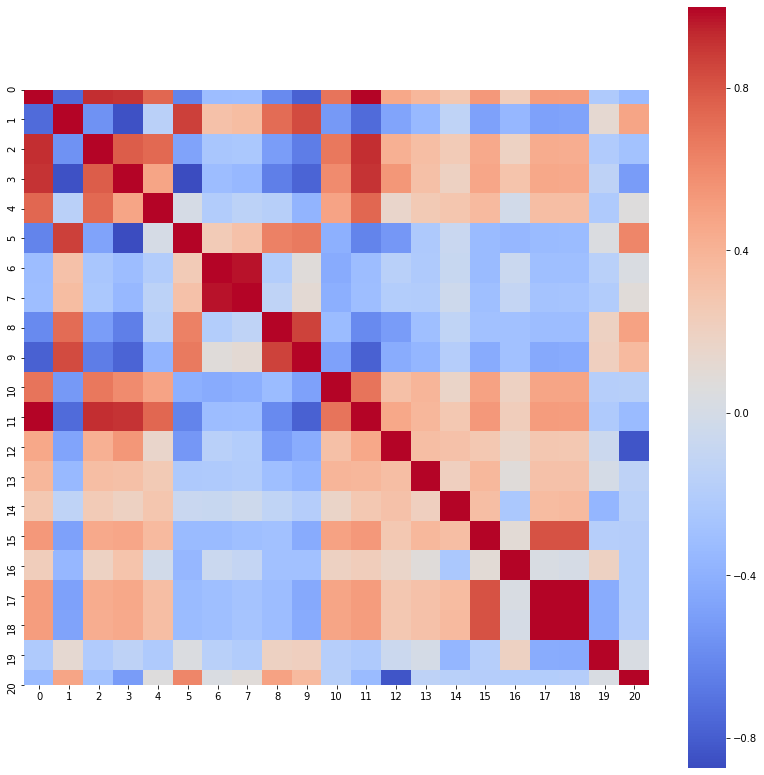

In [259]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [260]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]


In [261]:
print(data.head(6))


         0         1         4         5          6         8         9   \
0  0.059781  0.064241  0.090193  0.075122  12.863462  0.893369  0.491918   
1  0.066009  0.067310  0.092666  0.073252  22.423285  0.892193  0.513724   
2  0.077316  0.083829  0.131908  0.123207  30.757155  0.846389  0.478905   
3  0.151228  0.072111  0.207955  0.111374   1.232831  0.963322  0.727232   
4  0.135120  0.079146  0.206045  0.127325   1.101174  0.971955  0.783568   
5  0.132786  0.079557  0.209592  0.141634   1.932562  0.963181  0.738307   

         10        12        13        14        15        16        17  \
0  0.000000  0.084279  0.015702  0.275862  0.007812  0.007812  0.007812   
1  0.000000  0.107937  0.015826  0.250000  0.009014  0.007812  0.054688   
2  0.000000  0.098706  0.015656  0.271186  0.007990  0.007812  0.015625   
3  0.083878  0.088965  0.017798  0.250000  0.201497  0.007812  0.562500   
4  0.104261  0.106398  0.016931  0.266667  0.712812  0.007812  5.484375   
5  0.112555  0.11

In [265]:
from sklearn.model_selection import train_test_split
#pred=[0,1,2,3,4,6,8,11,12,16,19]
pred=[0,1,4,5,6,8,9,10,12,13,14,15,16,17,19]
train, test = train_test_split(data, test_size = 0.2,random_state=6)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(2534, 16)
(634, 16)


In [266]:
x_train = train[pred]# taking the training data input
y_train=train[20]# This is output of our training data
# same we have to do for test
x_test= test[pred] # taking test data inputs
y_test =test[20]   #output value of test dat

In [267]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
temp=logistic.predict(x_test)
print(metrics.accuracy_score(temp,y_test)) # to check the accuracy

0.9053627760252366


c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
